In [2]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read data

In [3]:
df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
df.head(10)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

# Analyze data 

In [4]:
# check if contains any null value 
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [5]:
#check correlation 
df.corr()

ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702    0.013898  0.014206  0.016990   
CreditCard          0.017028  0.007681    0.008967 -0.002385  0.007691   

                      Family     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.016797 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.046418 -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.052563 -0.050077   0.013152 -0.010582      -0.007413   
Income             -0.157501  0.645984  -0.187524  0.206806       0.502462   
ZIP Code            0.011778 -0.004061  -0.017377  0.007383       0.000107   
Family              1.000000 -0.109275   0.064929 -0.020445       0.061367   
CCAvg              -0.109275  1.000000  -0.136124  0.109905       0.366889   
Education           0.064929 -0.136124   1.000000 -0.033327       0.136722   
Mortgage           -0.020445  0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.061367  0.366889   0.136722  0.142095       1.000000   
Securities Account  0.019994  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.014110  0.136534   0.013934  0.089311       0.316355   
Online              0.010354 -0.003611  -0.015004 -0.005995       0.006278   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

In [6]:
# dropiing the ID value 
df.drop(columns='ID', inplace = True)


In [7]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
df.groupby('Personal Loan')['Age'].describe()

count       mean        std   min   25%   50%   75%   max
Personal Loan                                                            
0              4520.0  45.367257  11.450427  23.0  35.0  45.0  55.0  67.0
1               480.0  45.066667  11.590964  26.0  35.0  45.0  55.0  65.0

In [9]:
pd.value_counts(df['Personal Loan'].values)

0    4520
1     480
dtype: int64

In [10]:
df.shape

(5000, 13)

In [41]:
#data is extremely less for people who have not taken loans 

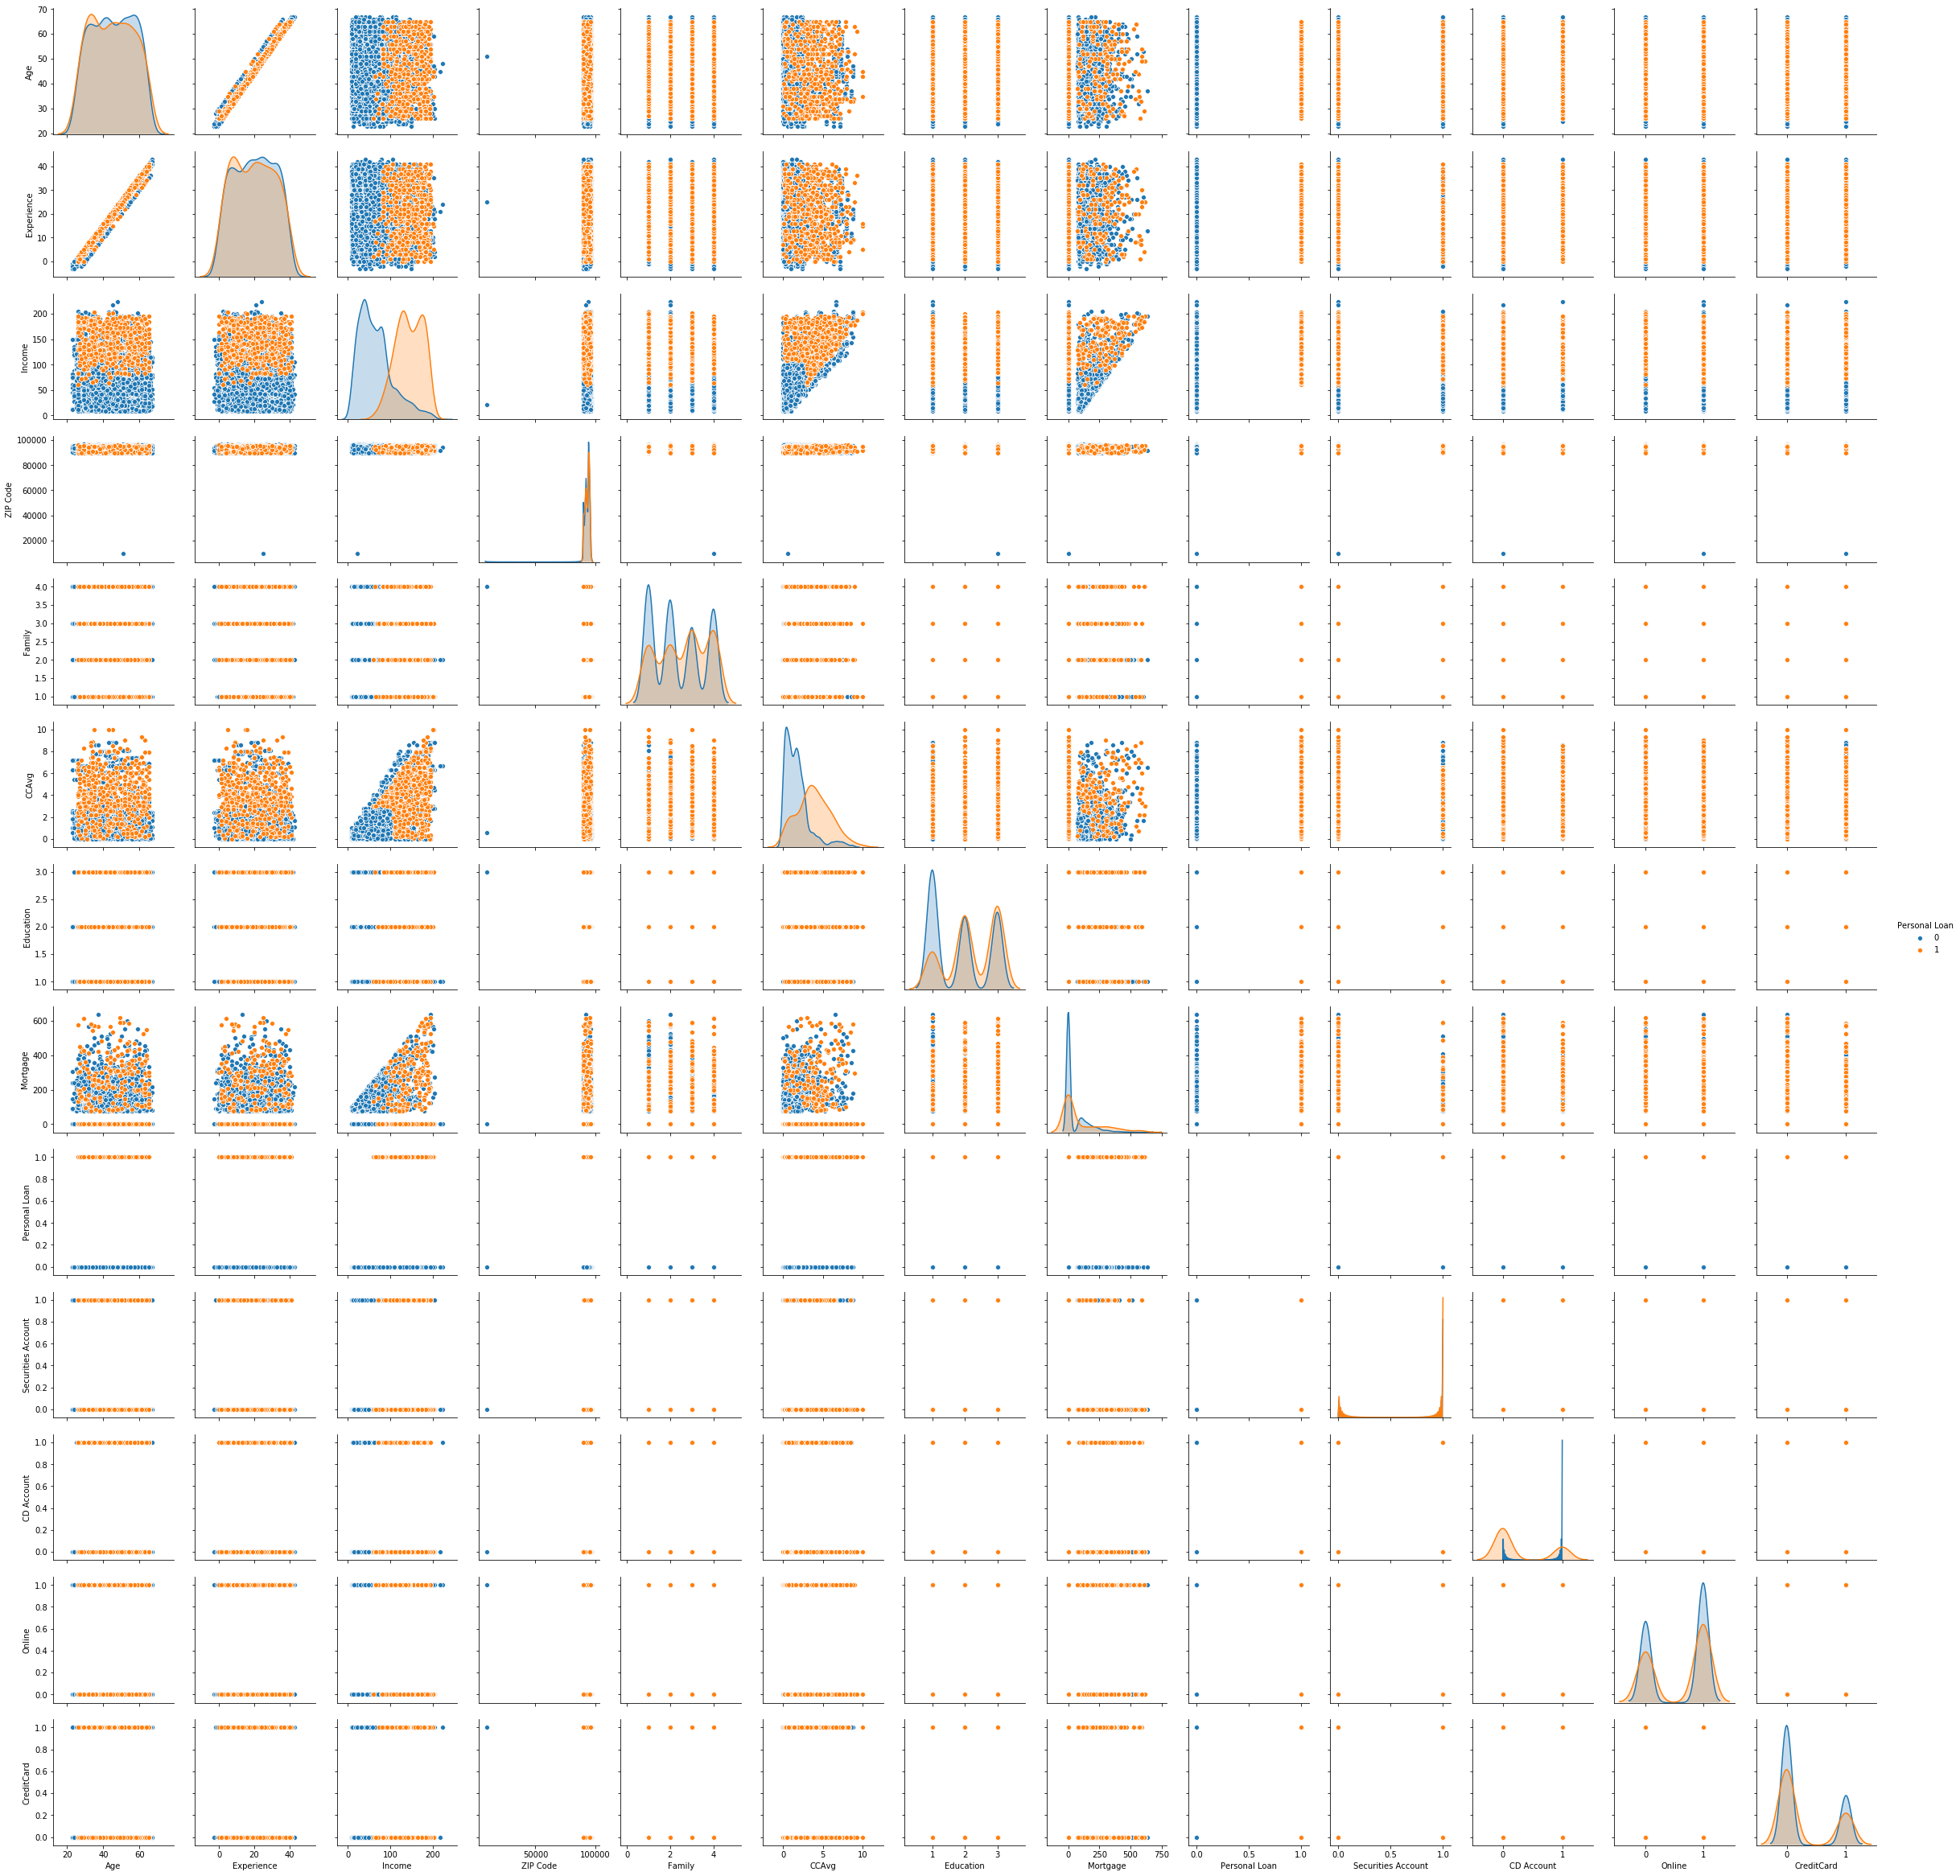

In [42]:
sns.pairplot(df, hue = "Personal Loan")

From the map : 
    Age and Experiance are not that good to distinguish between people takin PL (1) and people not taking Pl(0).
    
    'Income','Family','CCAvg','Education'and 'Mortgage' can be still used to figure out between 0 and 1 .
    

In [44]:
#correlation of each column with Personal Loan 
df[df.columns[:]].corr()['Personal Loan'][:]

Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

In [1]:
# From the above correlation - the age and experience do not relate much with our target column ie. Personal Loan. The ZIP Code is least related to the target attribute. 

In [45]:
#feature must have atleast some correlation with the target column.
df_features= df.loc[:,['Income','Family','CCAvg','Education','Mortgage','Personal Loan','CD Account']]

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


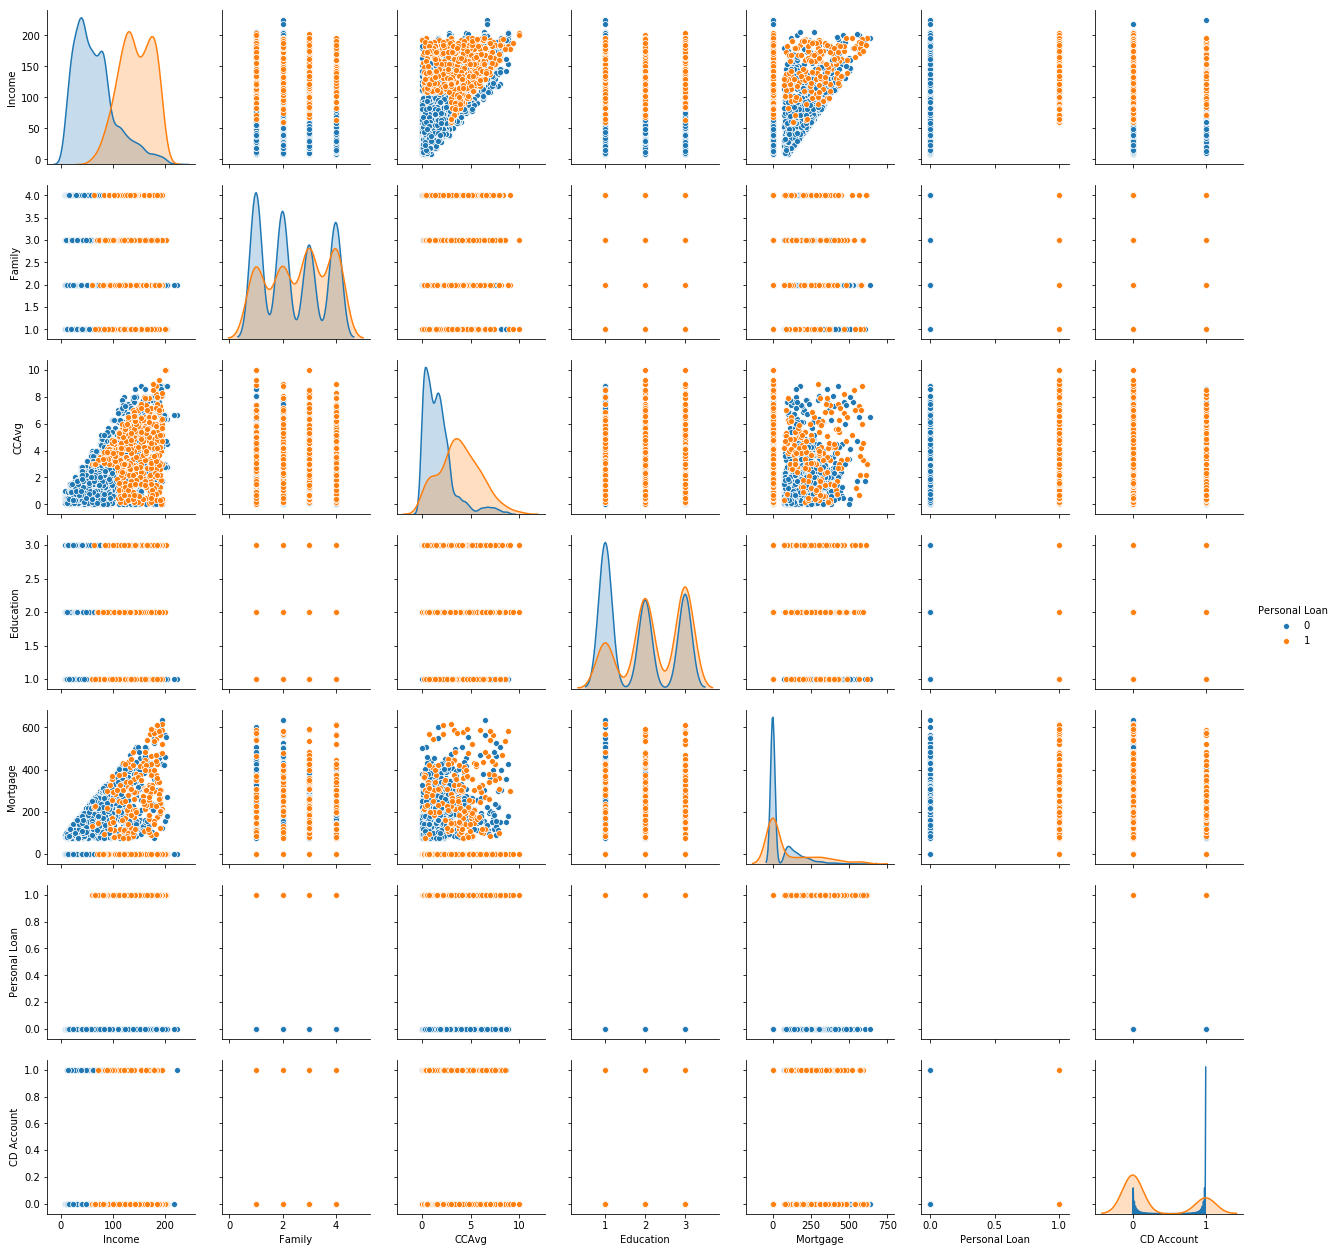

In [13]:
sns.pairplot(df_features,hue = "Personal Loan")

In [15]:
# A person with CD Account generally takes a personal loan 
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# Get the target column distribution. Your comments

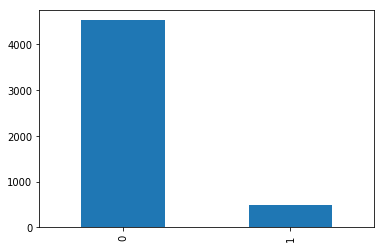

In [16]:
pd.value_counts(df["Personal Loan"]).plot(kind="bar")

In [17]:
#As the data is highly uneven, hence we need to balance the data using SMOTE.  

In [46]:
df.head(3)

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0

In [104]:
X = df.drop(columns = ['Personal Loan','ZIP Code','Experience','Age'])
Y = df['Personal Loan']

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [106]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 50) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
#ravel gives flattened one D array. 
#X_train.shape

#Logistic Regression

In [111]:
# Fit the model on 30%
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9566666666666667
[[1351   11]
 [  54   84]]


In [112]:
from sklearn import metrics
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1362
           1       0.88      0.61      0.72       138

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.92      0.80      0.85      1500
weighted avg       0.95      0.96      0.95      1500

[[1351   11]
 [  54   84]]


In [51]:
# As we have used SMOTE the data becomes even and hence we get better precision and recall

NAIVE BAYES 

In [113]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [114]:
# make predictions
from sklearn import metrics
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1362
           1       0.40      0.59      0.48       138

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.91      0.88      0.89      1500

[[1237  125]
 [  56   82]]


In [98]:
#KNN 

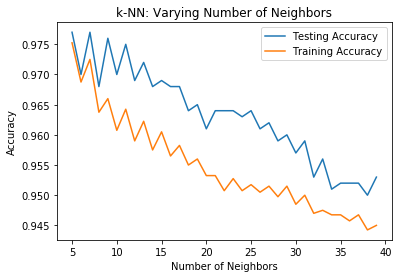

In [115]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import warnings
warnings.simplefilter('ignore')
neighbors = np.arange(5,40)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=4)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train_accuracy_plot[i] = knn.score(scaledX_train,y_train)
    test_accuracy_plot[i] = knn.score(scaledX_test,y_test) 
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=4)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(scaledX_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [117]:
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       912
           1       0.43      0.61      0.50        88

   micro avg       0.89      0.89      0.89      1000
   macro avg       0.69      0.77      0.72      1000
weighted avg       0.91      0.89      0.90      1000

[[840  72]
 [ 34  54]]


Among all the three algorithms , the best results are provided by logistic regression. 

Reason : 

We have a binary target variable (0 and 1 ) .

We have explanatory X-variables dependent varaibles ('Income','Family','CCAvg','Education','Mortgage','Personal Loan','CD Account')that are related to the target variable ( Personal Loan) .

It is reasonable to think that the value the Y-variable takes on is like a coin flip where the probability of getting a 1(“Personal Loan ”) depends on the dependent variables

KNN is not a generalisation model, for every time we need to find the target variable we need to look for distance of its features with other data points and also as this data set has many categorical columns the KNN model would not work really well. 

Coming to Naive bayes - it is good with numerical independent variables, however we have dependent variables , as well as it is good with multiclassification. 



The main disadvantage is that the Naive Bayes classifier makes a very strong assumption on the shape of your data distribution, i.e. any two features are independent given the output class.

